In [19]:
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Audio
from numpy.fft import fft, ifft
from copy import deepcopy

In [20]:
Fs, y = scipy.io.wavfile.read("train_bird.wav")
Audio(y, rate=Fs)

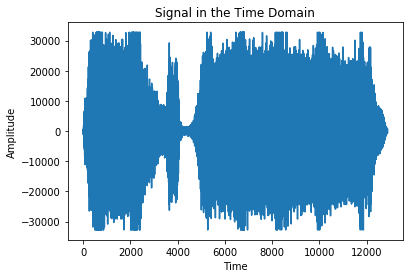

In [21]:
plt.title("Signal in the Time Domain")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.plot(np.linspace(0, len(y), len(y)), y)
plt.show()

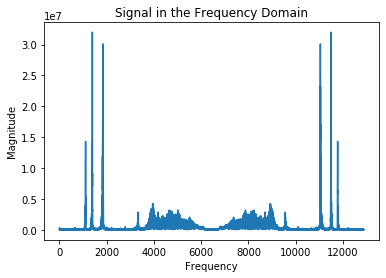

In [22]:
plt.title("Signal in the Frequency Domain")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

F = fft(y)

plt.plot(np.linspace(0, len(F), len(F)), abs(F))
plt.show()

In [47]:
# For the filter, we will set the index p to 2600
# because we can see 2600 is between the two distinct chunks of frequencies

p = 2600

def low_pass_filter(F):
    F_new = deepcopy(F)
    for i in range(p, len(F) - p):
        F_new[i] = 0
    return F_new
    
def high_pass_filter(F):
    F_new = deepcopy(F)
    for i in range(p):
        F_new[i] = 0
    for i in range(len(F) - p, len(F)):
        F_new[i] = 0
    return F_new

F_low = low_pass_filter(F)
F_high = high_pass_filter(F)

In [48]:
f_low = np.real(ifft(F_low))
f_high = np.real(ifft(F_high))

In [49]:
print("Audio for the low frequency signals.")
Audio(f_low, rate=Fs)

Audio for the low frequency signals.


In [50]:
print("Audio for the high frequency signals.")
Audio(f_high, rate=Fs)

Audio for the high frequency signals.


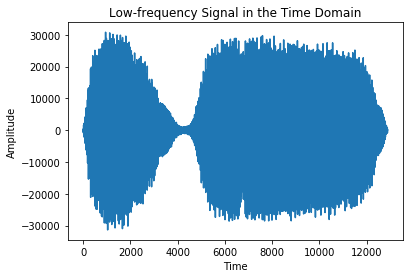

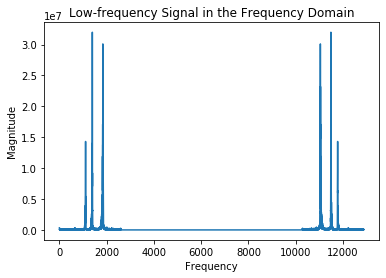

In [51]:
plt.title("Low-frequency Signal in the Time Domain")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.plot(np.linspace(0, len(f_low), len(f_low)), f_low)
plt.show()

plt.title("Low-frequency Signal in the Frequency Domain")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.plot(np.linspace(0, len(F_low), len(F_low)), abs(F_low))
plt.show()

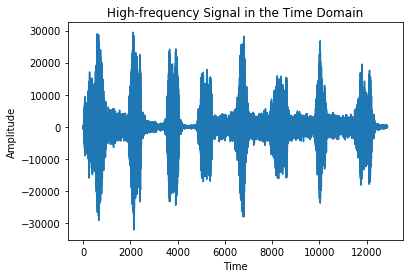

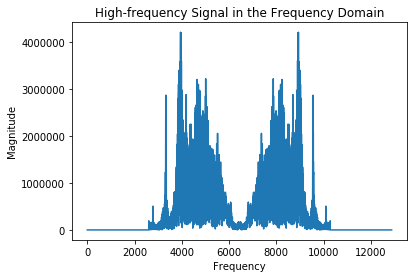

In [57]:
plt.title("High-frequency Signal in the Time Domain")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.plot(np.linspace(0, len(f_high), len(f_high)), f_high)
plt.show()

plt.title("High-frequency Signal in the Frequency Domain")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.plot(np.linspace(0, len(F_high), len(F_high)), abs(F_high))
plt.show()